In [1]:
from time import time

from primitives import SOL, IntVal, SegmentedBelt, non_intersecting_seg_belts

In [2]:
import matplotlib.pyplot as plt
def plot_seg_belt(belt, color='b'):
    xs = []
    ys = []
    pts = belt.eval_corners()
    for p in pts:
        xs.append(p[0])
        ys.append(p[1])
    plt.plot(xs, ys, '*-', color=color)

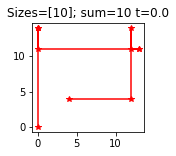

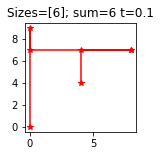

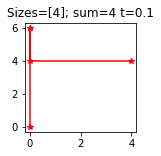

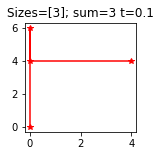

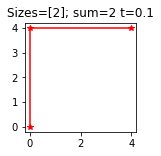

In [3]:
SOL.fresh_solver()

belt_red = SegmentedBelt()
belt_red.fix_ends((0,0), (4, 4))


sz = IntVal()
SOL.add(sz.v == belt_red.num_segs)

t0 = time()
dts = []
for cur_sz in SOL.shrinker_loop(sz, 38):
    t1 = time()
    dts.append(t1 - t0)
    t0 = time()

    l1 = SOL.eval(belt_red.num_segs)
    
    #plt.subplot(2,3, len(ss))
    plt.gcf().set_size_inches(2,2)
    plot_seg_belt(belt_red, color='r')

    plt.title(f'Sizes={[l1]}; sum={cur_sz} t={dts[-1]:.1f}')
    plt.show()


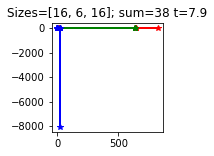

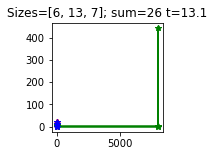

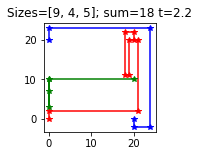

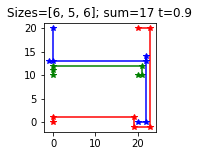

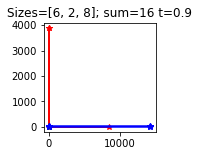

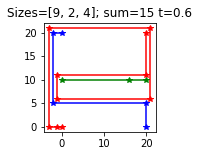

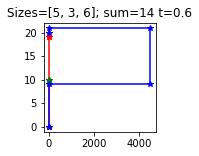

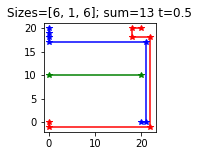

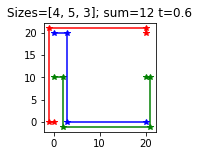

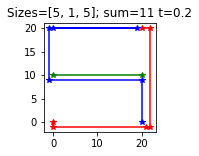

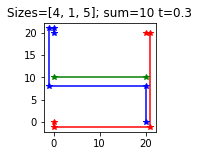

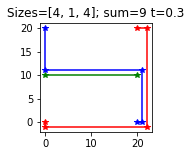

In [4]:
SOL.fresh_solver()

belt1 = SegmentedBelt()
belt2 = SegmentedBelt()
belt3 = SegmentedBelt()

non_intersecting_seg_belts(belt1, belt2)
non_intersecting_seg_belts(belt1, belt3)
non_intersecting_seg_belts(belt2, belt3)

belt1.fix_ends((0,0), (20, 20))
belt2.fix_ends((0,10), (20, 10))
belt3.fix_ends((0,20), (20, 0))

sz = IntVal()
SOL.add(sz.v == belt1.num_segs + belt2.num_segs + belt3.num_segs)

t0 = time()
dts = []
for cur_sz in SOL.shrinker_loop(sz, init=38, restore=False):
    t1 = time()
    dts.append(t1 - t0)
    t0 = time()

    l1 = SOL.eval(belt1.num_segs)
    l2 = SOL.eval(belt2.num_segs)
    l3 = SOL.eval(belt3.num_segs)
    
    #plt.subplot(2,3, len(ss))
    plt.gcf().set_size_inches(2,2)
    plot_seg_belt(belt1, color='r')
    plot_seg_belt(belt2, color='g')
    plot_seg_belt(belt3, color='b')
    plt.title(f'Sizes={[l1, l2, l3]}; sum={cur_sz} t={dts[-1]:.1f}')
    plt.show()
t1 = time()

    

In [5]:
t1 - t0

0.21651864051818848